# Regression Modeling

## Part 1: Linear Regression

Linear regression is related to correlation, so let's review that.

**Correlation** tries to measure the relationship among two or more linear variables. Let's read in a .csv file and examine some variables:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [6]:
flowers = pd.read_csv('iris.csv')
flowers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
flowers.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


pandas dataframes have a built in method for examining the correlation among columns (variables).


In [10]:
flowers.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


Let's plot the width of each flower petal against its length:

<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

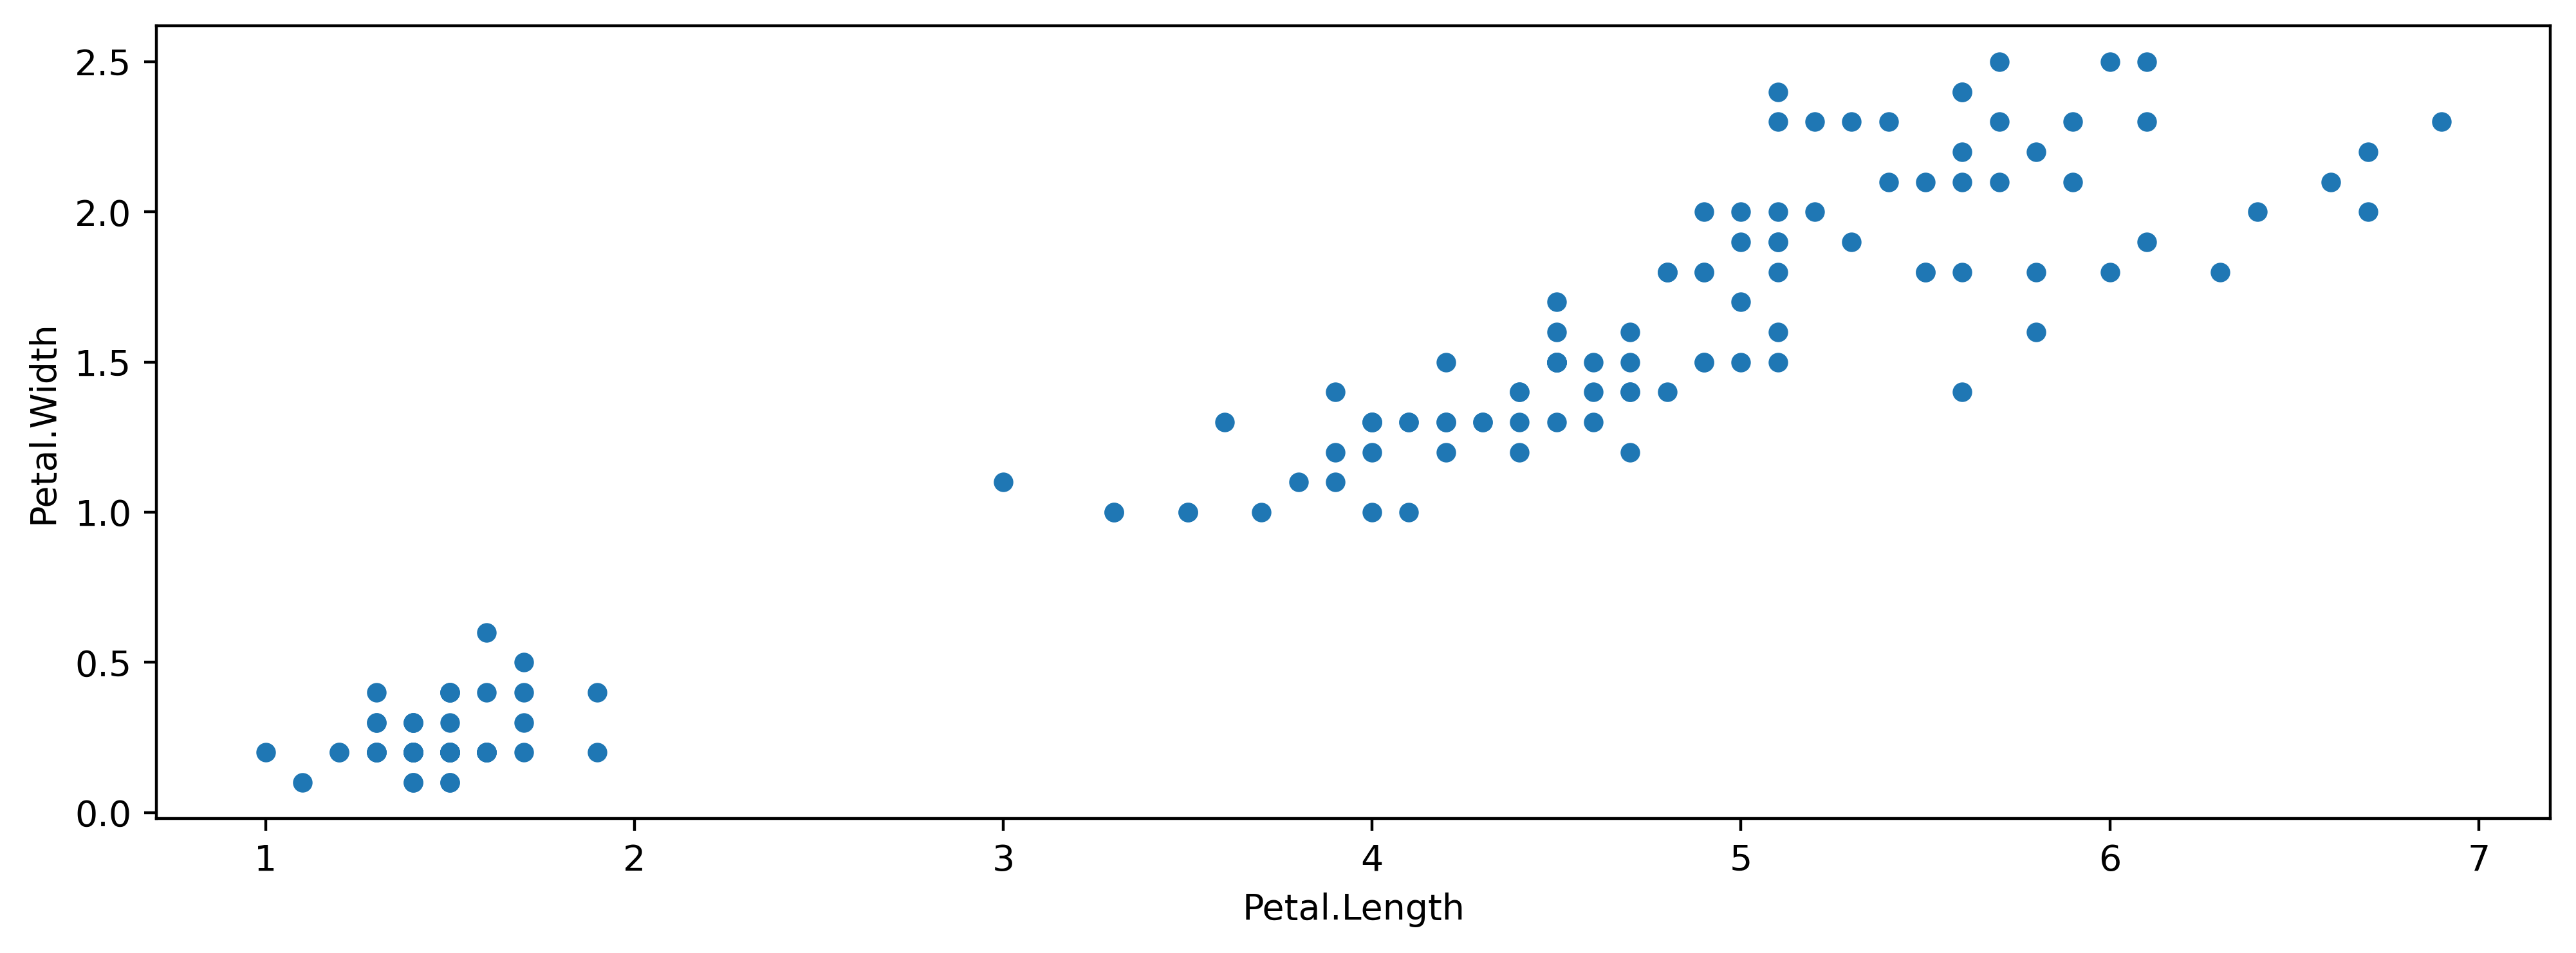

In [12]:
flowers.plot.scatter(x = 'Petal.Length',y = 'Petal.Width')

When we mentally (or actually) draw a line through this data to attempt to summarize the relationship, in statistics, that is a **regression line**. Recall the formula for a line is $ y = mx + c $  where $m$ is the slope and $c$ is the y-intercept.  The formula that describes a regression line will be similar, then... we just have some extra frilly stuff in the equation:  

$$ \hat{Y_i} = b_1 X_i + b_0 + \epsilon{_i} $$

notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. 
This is because we want to remember that *we're dealing with actual data*. 
In this equation, $X_i$ is the value of *predictor variable for the ith observation* (i.e., the petal length)
, and $Y_i$ is the corresponding value of the outcome variable (i.e., the petal width). 
What we're assuming is that this formula works for all observations in the data set (i.e., for all i).

#### Residuals & Error
In addition there is an extra term here to describe the data, because not ALL the data sits on the line. To account for the data that's not on the line (i.e., "accounted for by the model") we have to calculate the difference between the "model prediction" and the actual data (i.e., the distance between each point and the line:

$$ \epsilon{_i} = Y_i - \hat{Y_i}$$

This is our **error term** which are referred to as "residuals" in a regression model. 

A "good" regression model (one that predicts the data very well) will have all the data points tightly clustered close to the line. 

In [14]:
import statsmodels.api as sm

# Requires a pandas DataFrame with the columns to be regressed (Petal.Width and Petal.Length)
# Identify the columns that you want to regress:

X = flowers['Petal.Length']
y = flowers['Petal.Width']
X = sm.add_constant(X)  # The "constant" is the intercept. In Python it has to be added to the formula manually.

model = sm.OLS(y, X) # OLS stands for "ordinary least squares" which is the most common type of linear regression.
results = model.fit() # Run the model with the actual data and store the results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Petal.Width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           4.68e-86
Time:                        11:40:08   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

#### Interpreting the Table

The table outputs a LOT of information. Of particular note are the values of the **coefficients** for "const" (i.e., the value of the intercept), and our predictor variable (Petal.Length). This is the y-intercept and slope, respectively (which you can see from comparing with the plot above).

The **$R^2$ value** is a value between 0 and 1 that is a measure that explains how much of the variation in the observed data (the dependent variable) can be predicted by the predictor data (the independent variable)? You will see an "Adj. R squared" metric, (which stands for 'Adjusted R squared'), which attempts to balance the inherent increase in $R^2$ that will always accompany an increase in the number of predictor variables. In other words, when you have a larger number of predictor variables, the adj. R^2 is probably more reliable than the R^2.

The row of data for the predictor variable will come underneath the intercept. Here you'll fine not only the coefficient (slope) but also the **standard error** (), a "t-value" and "p-value", and confidence intervals. While we will not go into detail about statistical tests, the basic idea is that:

The standard error is critical for conducting hypothesis tests on the coefficients (i.e., is this slope or relatinship meaningful? Or likely just observed by chance?) The most common hypothesis test is to check whether each coefficient is significantly different from zero. This test is done using a t-statistic, which is calculated by dividing the coefficient by its standard error. The resulting t-statistic (t-value) is then compared to a critical value from a probability distribution (t-distribution) to determine if the coefficient is significantly different from zero. This is why you have these values in the table. If the p-value is less than 0.05 then it means the predictor is statistically significant (i.e., the model is "working" at better-than-chance level).


## Part 2: Logistic Regression

##### 15. Logistic Regression
Logistic regression, a fundamental statistical tool for analyzing the relationship between categorical outcomes and one or more predictor variables. Unlike linear regression, which models the relationship with interval scale outcomes, logistic regression is used for binary or dichotomous outcomes—where the results are either one thing or another, such as "yes" or "no", "success" or "failure".

##### 15.1 What is a Logistic Regression Model?
To introduce logistic regression, we will use a sample dataset. Similar to how we previously explored correlations, we'll start by visualizing data with plots to understand relationships.

In logistic regression, the relationship between the predictors *and the log-odds* of the outcome is modeled. Imagine we have a plot with product purchase on the Y-axis (0 for no, 1 for yes) and age on the X-axis. Instead of imagining a straight line through the data as we do in linear regression, we imagine an S-shaped curve (sigmoid function).

#### Understanding Sigmoid 
The sigmoid function, is fundamental in logistic regression as it transforms any real-valued number into the (0, 1) interval. This makes it ideal for modeling probability as an output since the probabilities must be between 0 and 1.

$$\sigma(z)= \frac{1}{1+e^{−z}}$$


With the logistic regression equation given by:

$$\hat{p} = \frac{1}{1+ e^{-(b_0 + b_1 x)}}$$

where $p$ is the predicted probability of the outcome being 1 (e.g., purchasing the product),  $b_0$ is the intercept, and $b_1$ is the coefficient for the predictor $x$ (e.g., age).

The predictors and coefficients in this logistic model are similar to those in linear regression, but their interpretation is different. Here, $b_1$ indicates how the log-odds of the outcome change with a one-unit change in the predictor.

Text(0, 0.5, 'sigmoid(z)')

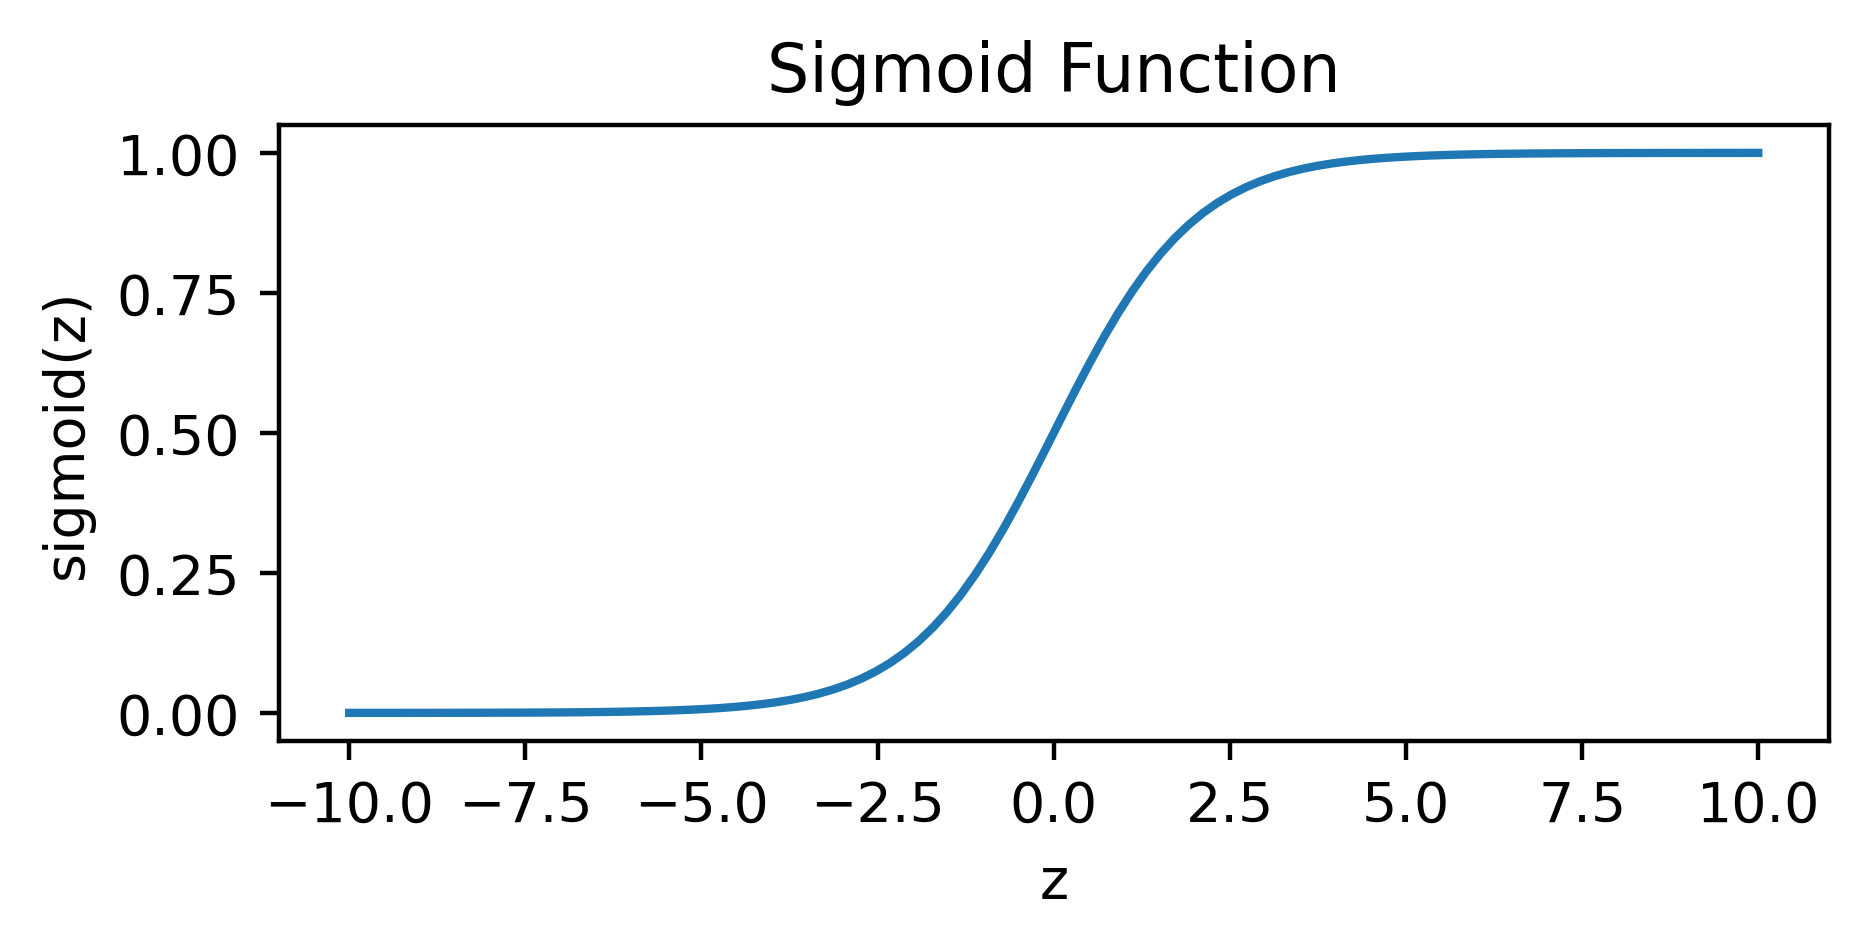

In [20]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values from -10 to 10 to represent z
z = np.linspace(-10, 10, 100)

# Compute sigmoid values for each z
p = sigmoid(z)

# Create a plot
plt.figure(figsize=(5, 2))
plt.plot(z, p)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')


#### Example

Let's read in the `TitanicSurvival.csv` dataset and plot a variable to illustrate:

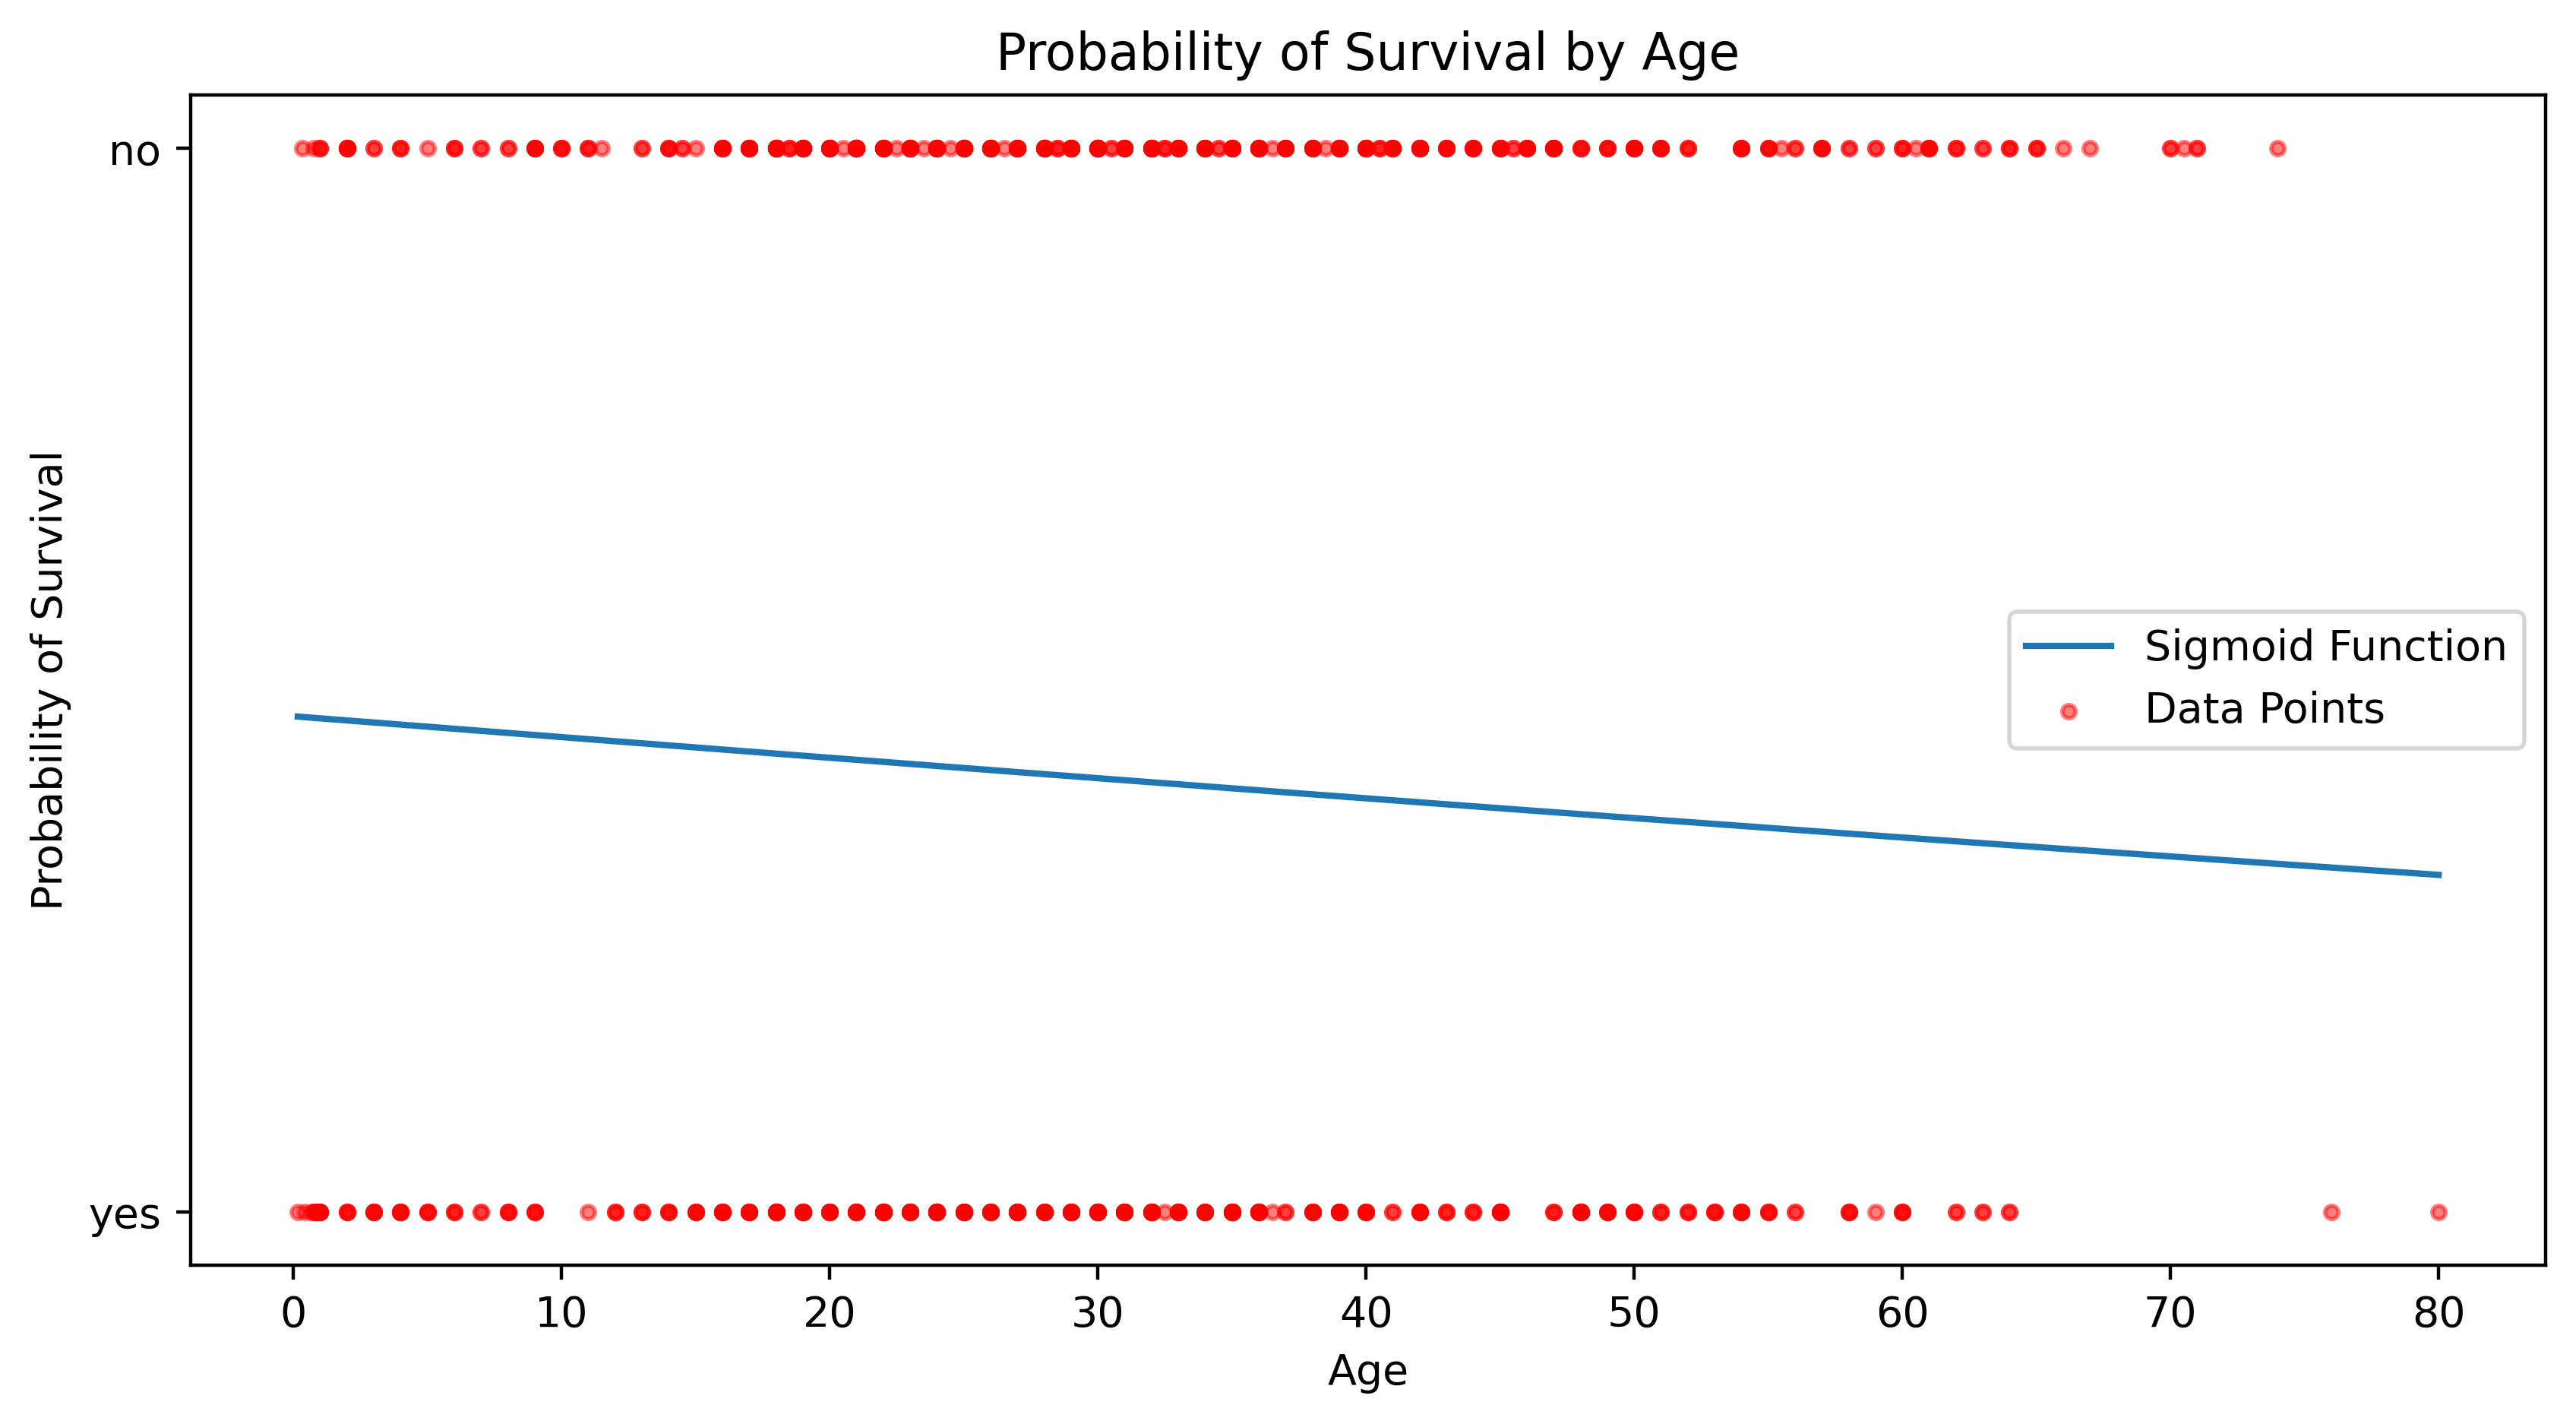

In [28]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('TitanicSurvival.csv')
# Convert 'sex' from categorical to numeric (male: 0, female: 1)
data['sex'] = data['sex'].map({'male': 0, 'female': 1}) # not important: just to illustrate the graphic

# Prepare the data
data.dropna(inplace=True)  # Remove rows with missing values
X = data[['age']]  # Predictor variable
y = data['survived']  # Outcome variable

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get the intercept and coefficient for age
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Define a range of ages and calculate predicted probabilities
ages = np.linspace(start=min(data['age']), stop=max(data['age']), num=300)
probabilities = 1 / (1 + np.exp(-(b0 + b1 * ages)))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(ages, probabilities, label='Sigmoid Function')
plt.scatter(data['age'], data['survived'], color='red', s=10, alpha=0.5, label='Data Points')
plt.title('Probability of Survival by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Survival')
plt.legend()